# Part 1a

## Contents

### Import libraries
### Import files
### Data Check
### PII Data
### Q3: Regional Data Segmentation
### Q4: Low Activity Customer Exclusion


## Import libraries 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Files

In [2]:
#Turned folder path into string 
path= r'/Users/pamnouboussi/27.05.23 Instacart Basket Analysis'

In [3]:
#Import all_orders_products_customers_high_activity file
all_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

## Data check

In [5]:
#view dataframe information
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Unnamed: 0_x                  int64   
 1   order_id                      int64   
 2   user_id                       int64   
 3   order_number                  int64   
 4   orders_day_of_week            int64   
 5   order_hour_of_day             int64   
 6   days_since_last_order         float64 
 7   product_id                    int64   
 8   add_to_cart_order             int64   
 9   reordered                     int64   
 10  Unnamed: 0_y                  int64   
 11  product_name                  object  
 12  aisle_id                      int64   
 13  department_id                 int64   
 14  prices                        float64 
 15  exists                        category
 16  busiest_day                   object  
 17  Busiest_days                  object  
 18  

### Attmpted to drop unnamed 0_y and 0_x collums but kernel kept dying while trying to run the code so I have left it in. 

## PII data 
 The dataset contains customers first and last names. This will be removed to protect privacy.

In [6]:
# Dropping first and last name columns

all_merged = all_merged.drop(columns = ['first_name', 'last_name'])

In [7]:
#check all columns droped 
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Unnamed: 0_x                  int64   
 1   order_id                      int64   
 2   user_id                       int64   
 3   order_number                  int64   
 4   orders_day_of_week            int64   
 5   order_hour_of_day             int64   
 6   days_since_last_order         float64 
 7   product_id                    int64   
 8   add_to_cart_order             int64   
 9   reordered                     int64   
 10  Unnamed: 0_y                  int64   
 11  product_name                  object  
 12  aisle_id                      int64   
 13  department_id                 int64   
 14  prices                        float64 
 15  exists                        category
 16  busiest_day                   object  
 17  Busiest_days                  object  
 18  

## Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

### Create Region column

In [4]:
# Creating region column to assign sorted states to

region = []

In [5]:
# Checking state names in state column

all_merged['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [6]:
# creating regions list Northeast, Midwest, South and West

for value in all_merged['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [7]:
# view results
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [8]:
# adding region column to df

all_merged['region'] = region

In [9]:
# Checking frequency distribution

all_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Visualising results

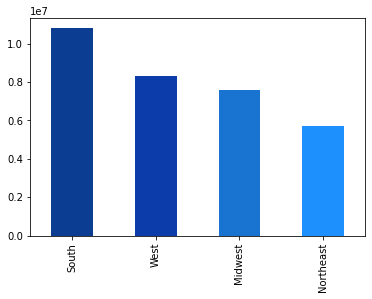

In [13]:
#Create bar chart
customers_per_region_bar = all_merged['region'].value_counts(dropna = False).plot.bar(color = ['#0B3E92', '#0C3BAA','#1973D1', '#1E90FE'])

In [14]:
# Exporting the bar chart
customers_per_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_per_region_bar.png'))

In [13]:
#results check
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South


### Determine whether there’s a difference in spending habits between the different U.S. regions using spending flag

In [18]:
# Creating a cross tabulation between region and spending flag 

crosstab_regions_spending1 = pd.crosstab(all_merged['region'], all_merged['spending_flag'], dropna = False) 

In [19]:
# Checking the output

crosstab_regions_spending1

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [12]:
# calculate total, % spent from each region
crosstab_regions_spending['Total'] = crosstab_regions_spending.sum(axis=1)
crosstab_regions_spending['% High spender'] = 100 * crosstab_regions_spending['High spender'] / crosstab_regions_spending['Total']
crosstab_regions_spending['% Low spender'] = 100 * crosstab_regions_spending['Low spender'] / crosstab_regions_spending['Total']

In [13]:
crosstab_regions_spending

spending_flag,High spender,Low spender,Total,% High spender,% Low spender
region,,,,,
Midwest,155975,7441350,7597325,2.053025,97.946975
Northeast,108225,5614511,5722736,1.891141,98.108859
South,209691,10582194,10791885,1.943043,98.056957
West,160354,8132559,8292913,1.933627,98.066373


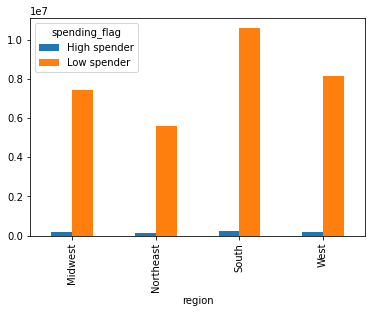

In [23]:
# Creating a stacked bar chart

#Create bar chart
region_spending_bar = crosstab_regions_spending1.plot.bar()

In [25]:
# Exporting the bar chart:

region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_spending_bar.png'))

## Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Create Low activity exclusion flag

In [8]:
#Creat exclusion flag
all_merged.loc[all_merged['max_order'] < 5, 'low_activity_flag'] = 'low-activity customer'

In [9]:
all_merged.loc[all_merged['max_order'] >= 5, 'low_activity_flag'] = 'high-activity customer'

In [10]:
# execution check
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,low_activity_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,high-activity customer
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,high-activity customer
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,high-activity customer
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,high-activity customer
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,high-activity customer


In [11]:
# Checking frequency distribution

all_merged['low_activity_flag'].value_counts(dropna = False)

high-activity customer    30964564
low-activity customer      1440295
Name: low_activity_flag, dtype: int64

Creating a sample of df with high activity customers

In [13]:
# Creating a sample with only high-activity customers

high_activity_customers = all_merged[all_merged['low_activity_flag'] == 'high-activity customer']

In [ ]:
# Exporting high_activity customers sample

high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_orders_products_customers_high_activity.pkl'))

In [ ]:
# error check

all_merged.shape